In [76]:


import pandas as pd

df=pd.read_csv('datos_tratados.csv')


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)  # o None si quieres todas


df.head(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85


separamos en la variable independiente y dependientes

In [77]:

X = df.drop(columns=['Churn', 'CustomerID'])
y = df['Churn']

In [78]:
X

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7039,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,Male,No,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7041,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


las columnas categoricas la normalizamos pues los modelos de machine learning trabajan mejor con numeros se usan 0 o 1 por que si se usan mas el modelo le puede dar mas peso 

In [79]:
binary_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'SeniorCitizen',
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]
for col in binary_cols:
    X[col] = X[col].map({'Yes': 1, 'No': 0})


In [80]:
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})


In [82]:
X = pd.get_dummies(X, columns=[
    'InternetService',
    'Contract',
    'PaymentMethod',
    'MultipleLines'
], drop_first=True)


In [84]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


In [85]:
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,ChargesDaily,ChargesMonthly,ChargesTotal,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes
0,0,0,1,1,9,1,0,1,0,1,1,0,1,2.19,65.6,593.30,0,0,1,0,0,0,1,0
1,1,0,0,0,9,1,0,0,0,0,0,1,0,2.00,59.9,542.40,0,0,0,0,0,0,1,1
2,1,0,0,0,4,1,0,0,1,0,0,0,1,2.46,73.9,280.85,1,0,0,0,0,1,0,0
3,1,1,1,0,13,1,0,1,1,0,1,1,1,3.27,98.0,1237.85,1,0,0,0,0,1,0,0
4,0,1,1,0,3,1,0,0,0,1,1,0,1,2.80,83.9,267.40,1,0,0,0,0,0,1,0


In [86]:
y = y.map({'Yes': 1, 'No': 0})
y

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: Churn, Length: 7043, dtype: int64

In [87]:
y.value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [88]:
#pip install imbalanced-learn


ahora el siguiente proceso es balancear  los datos al tener mas de una opccion el modelo tienen a predeccir mas de ese valor con un balanceo para evitar hay que nivelar los datos y el otro proceso es el normalizado este va primero para que el proceso de balanceado quede mejor hecho 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# Escalado (MUY IMPORTANTE para KNN y SVM)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE (solo train)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


entrenamos los modelos 

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_bal, y_train_bal)
    print(f"{nombre} entrenado correctamente")


Logistic Regression entrenado correctamente
KNN entrenado correctamente
SVM entrenado correctamente


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

resultados = {}

for nombre, modelo in modelos.items():
    
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    resultados[nombre] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


                     Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression  0.765082   0.539450  0.786096  0.639826  0.853140
KNN                  0.687722   0.446429  0.735294  0.555556  0.760274
SVM                  0.767211   0.548729  0.692513  0.612293  0.825873


Porque en un problema de churn el objetivo principal es maximizar la detección de clientes que se van. Logistic Regression obtuvo el mayor recall y el mejor ROC-AUC, lo que la convierte en la mejor opción desde el punto de vista de negocio

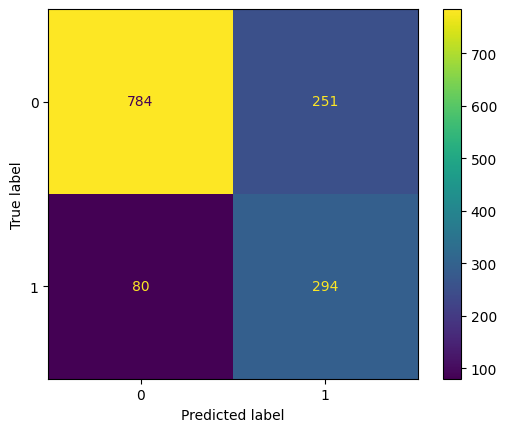

In [92]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mejor_modelo = modelos["Logistic Regression"]

y_pred = mejor_modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


vemos que los positivos tienen un bueno numero de prediccion pero  tenemos 251 que en realidad no se iba y la empresa gasto dinero en descuento y demas si es muy grande la perdida en comparacion a la ganancia hay que trabajar para disminui este numero 